In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

%matplotlib inline

## 加载数据

In [3]:
# delimiter : str, optional.The default is whitespace.
datas = np.loadtxt("data.txt", delimiter=",", dtype="float64")

In [4]:
datas.shape, datas.dtype

((47, 3), dtype('float64'))

In [5]:
df = pd.DataFrame(datas, columns=['x1', 'x2', 'y'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
x1    47 non-null float64
x2    47 non-null float64
y     47 non-null float64
dtypes: float64(3)
memory usage: 1.2 KB


In [7]:
df.describe()

,x1,x2,y
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


## 可视化显示

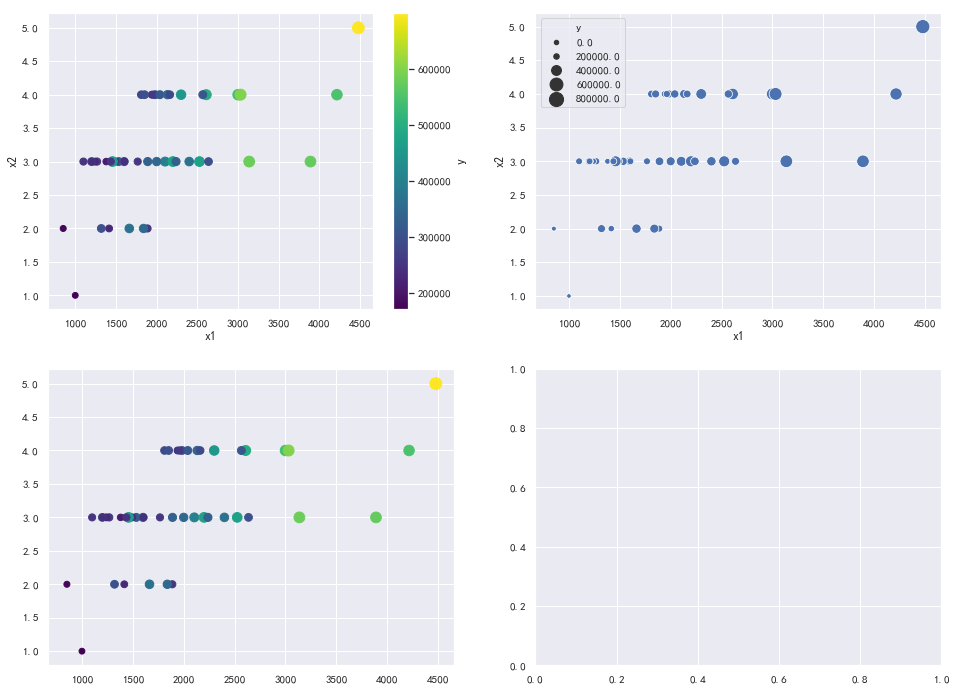

In [8]:
#暂时不会画三维图，使用二维代替
fig, axs = plt.subplots(2,2,figsize=(16,12))

df.plot.scatter(x='x1', y='x2', c='y', s=df['y']/5000, colormap='viridis', ax=axs[0, 0])

#sizes设置最小最大
sns.scatterplot(x='x1', y='x2', size='y', sizes=(20,200), data=df, ax=axs[0, 1])

axs[1, 0].scatter(x=df['x1'], y=df['x2'], c=df['y'], cmap='viridis', s=df['y']/5000)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


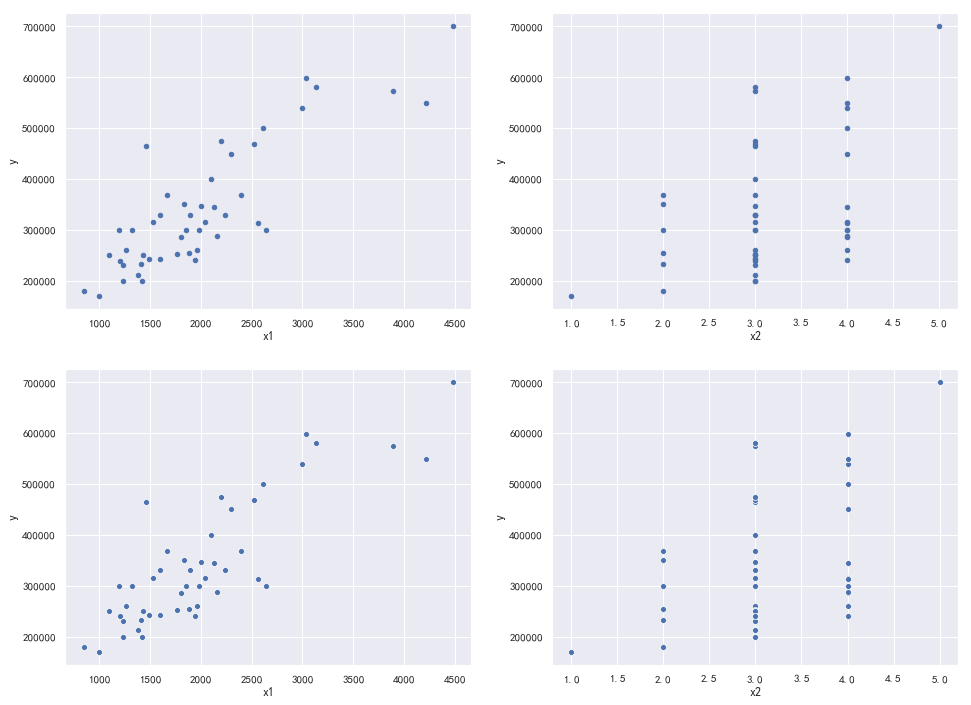

In [9]:
#可以看出来x1的权重应该比x2大
fig, axs = plt.subplots(2,2 ,figsize=(16,6 * 2))

# df
df.plot.scatter(x='x1', y='y', ax=axs[0,0])
df.plot.scatter(x='x2', y='y', ax=axs[0,1])

# seaborn
sns.scatterplot(x='x1', y='y', data=df, ax=axs[1,0])
sns.scatterplot(x='x2', y='y', data=df, ax=axs[1,1])

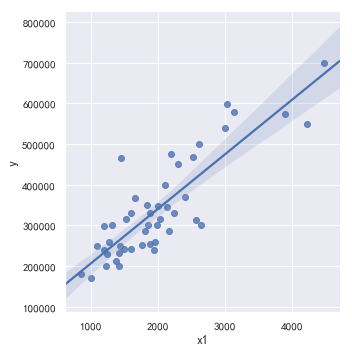

In [10]:
# seaborn lmplot，没有ax参数
sns.lmplot(x='x1', y='y', data=df)

## 手写实现

下面是损失函数，以及对各个变量的偏导数公式：
![](assets/LinearRegression01.png)

In [11]:
# 假设y = ax0 + b*x1 + c*x2，暂时不会矩阵的求导
# 其实上面的x0对每个行数据都是1，所以偏导公式都是可以用下面的一个

def getGradient(x, theta, y):
    pass

### ndarray计算

In [12]:
# 构建x的矩阵
x = datas[:, 0:-1]
# 填充x0
x0 = np.ones((datas.shape[0],1))
x = np.hstack([x0, x])
x.shape

(47, 3)

In [13]:
#x 一定要用归一化等，不然要迭代好久，而且对于这个例子可能震荡的特别厉害，x2的值太大了，计算出来的导数也太大
# 刚开始就被坑了，一时计算出nan，而是损失函数会增大，主要是一个导数计算出来太大了

# 归一化feature
def featureNormaliza(X):
    X_norm = np.array(X)            #将X转化为numpy数组对象，才可以进行矩阵的运算
    #定义所需变量
    mu = np.zeros((1,X.shape[1]))   
    sigma = np.zeros((1,X.shape[1]))
    
    mu = np.mean(X_norm,0)          # 求每一列的平均值（0指定为列，1代表行）
    sigma = np.std(X_norm,0)        # 求每一列的标准差
    for i in range(X.shape[1]):     # 遍历列
        X_norm[:,i] = (X_norm[:,i]-mu[i])/sigma[i]  # 归一化
    
    return X_norm,mu,sigma

X,mu,sigma = featureNormaliza(x[:,1:])
x[:,1:] = X

In [14]:
x.mean(axis=0)

array([ 1.00000000e+00, -9.44870659e-18,  2.48028548e-16])

In [15]:
x.std(axis=0)

array([0., 1., 1.])

In [16]:
# 需要求的参数，设置初始值
theta = np.full((x.shape[1],1), 1)
theta

array([[1],
       [1],
       [1]])

In [17]:
y = datas[:,-1]
y = y.reshape(-1,1)   #将行向量转化为列
y.shape

(47, 1)

![](assets/LinearRegression01.png)

In [18]:
def getGradient(x, theta, y):
    h_y = (np.dot(x, theta) - y) 
    
    gradient0 = (h_y * x[:, 0].reshape(-1,1)).mean()
    gradient1 = (h_y * x[:, 1].reshape(-1,1)).mean()
    gradient2 = (h_y * x[:, 2].reshape(-1,1)).mean()
    
    return (gradient0, gradient1, gradient2)

In [19]:
# 计算代价函数
def computerCost(x,y,theta):    
    return ( (np.dot(x, theta) - y) ** 2 ).mean()/2

In [20]:
theta = np.full((x.shape[1],1), 10)
alpha = 0.01 # 步长
num_iters = 0
max_iters = 100000
c = 0.001 #两次结果小于这个值就停止迭代
preCost = 0
while(True):    
    gradient0, gradient1, gradient2 = getGradient(x, theta, y)
    theta = theta - np.array([gradient0, gradient1, gradient2]).reshape(-1,1) * alpha        
    cost = computerCost(x,y,theta)    
    if(num_iters != 0 and (preCost - cost < c or num_iters > max_iters) ):
        break
    if(num_iters % 1000 == 0):       
        print(cost)
    preCost = cost
    num_iters += 1
print(num_iters) 
print(cost)
#2043280050.603164

64292885013.76273
2043497024.7329688
2043280082.6423357
2641
2043280050.715115


In [21]:
# 340412.6595744681
# [109447.79646964  -6578.35485416]
# 上面是使用sklearn得到的借据和权重(执行了相同的归一化)，和我这差不多，因为公式都一样，损失函数也一样
theta

array([[340412.65957347],
       [109447.2913179 ],
       [ -6577.84970242]])

In [22]:
# 测试学习效果（预测）
def predict(mu,sigma,theta):
    result = 0
    # 注意归一化
    predict = np.array([2104,3])
    norm_predict = (predict-mu)/sigma
    final_predict = np.hstack((np.ones((1)),norm_predict))
    
    result = np.dot(final_predict,theta)    # 预测结果
    return result

In [23]:
predict(mu, sigma, theta)

array([356282.92974171])

In [24]:
# 这个结果似乎还是可以的,平均误差
# 这里的y的shape一定要是(,1),不然会广播计算
np.mean(np.abs(np.dot(x, theta) -y) / y)

0.15607417883441707

### 矩阵和向量相乘
上面的计算全部使用的二维的ndarray，其实不必，使用向量与矩阵的相乘即可。

In [25]:
# a: 4x3
a = np.array([[1,2,3],
              [4,5,6],
              [1,1,1],
              [2,2,2]
             ])
# b: 3
b = np.array([1,2,3])

In [26]:
# 矩阵 x 向量 -> 向量
np.dot(a, b)

array([14, 32,  6, 12])

In [27]:
# 报错
# np.dot(b, a)

In [28]:
# 矩阵 x 矩阵 -> 矩阵
# 矩阵就是二维数组
np.dot(a, b.reshape(-1, 1))

array([[14],
       [32],
       [ 6],
       [12]])

In [29]:
# 向量 x 向量 -> 标量
np.dot(b, b)

14

### 矩阵和向量计算线性回归

In [30]:
datas.mean(axis=0)

array([2.00068085e+03, 3.17021277e+00, 3.40412660e+05])

In [31]:
x.mean(axis=0)

array([ 1.00000000e+00, -9.44870659e-18,  2.48028548e-16])

In [32]:
# 重新赋值吧
X = datas[:,:-1]
y = datas[:,-1]

X.shape, y.shape

((47, 2), (47,))

In [33]:
def featureNormaliza(X):
    X_norm = np.array(X)            #将X转化为numpy数组对象，才可以进行矩阵的运算
    #定义所需变量
    mu = np.zeros((1,X.shape[1]))   
    sigma = np.zeros((1,X.shape[1]))
    
    mu = np.mean(X_norm,0)          # 求每一列的平均值（0指定为列，1代表行）
    sigma = np.std(X_norm,0)        # 求每一列的标准差
    for i in range(X.shape[1]):     # 遍历列
        X_norm[:,i] = (X_norm[:,i]-mu[i])/sigma[i]  # 归一化

In [34]:
class MyStandardScaler():
    def __init__(self):
        self.means = np.array([0])
        self.stds = np.array([1])
        
    def fit(self, array):
        # 每列的平均值与标准差
        self.means = np.mean(array, axis=0)
        self.stds = np.std(array, axis=0)
        
    def transform(self, array):
        return (array - self.means) / self.stds
    
    def fit_transform(self, array):
        self.fit(array)
        return self.transform(array)

In [35]:
myStd = MyStandardScaler()
X_train = myStd.fit_transform(X)
X_train.mean(axis=0), X_train.std(axis=0)

(array([-9.44870659e-18,  2.48028548e-16]), array([1., 1.]))

![](assets/LinearRegression01.png)

In [36]:
class MyLinearRegression():
    def __init__(self, fit_intercept=True ):
        self.fit_intercept = fit_intercept
        
        self.intercept_ = None
        self.coef_ = []
        
    def fit(self, X, y, alpha = 0.01, max_iters = 100000, c = 0.001):
        self.alpha = alpha #学习率
        self.max_iters = max_iters
        self.c = c #两次结果之差小于这个值就停止迭代
        
        if self.fit_intercept:
            theta = np.full(X.shape[1]+1, 1)#权重向量，带截距
            X = np.hstack([np.ones((X.shape[0],1)), X])
        else:
            theta = np.full(X.shape[1], 1)#权重向量，不带截距
            X = X.copy()
        
        num_iters = 0
        preCost = 0
        while(True): 
            gradient = self.get_gradient(X, y, theta)
            theta = theta - gradient * alpha
            cost = self.computer_cost(X,y,theta)    
            if(num_iters != 0 and (preCost - cost < c or num_iters > max_iters) ):
                break
            if(num_iters % 1000 == 0):       
                print("cost:%f" % cost)
            preCost = cost
            num_iters += 1           
            
        if self.fit_intercept:
            self.intercept_ = theta[0]
            self.coef_ = theta[1:]
        else:
            self.intercept_ = None
            self.coef_ = theta[:]
            
        print("final cost:%f" % cost)
        
    
    def get_gradient(self, X, y, theta):
        h_y = (np.dot(X, theta) - y)
        #np.dot(h_y.reshape(1, -1), X) / X.shape[0]
        # 把矩阵放到左边省的再把向量转换成矩阵，麻烦
        return np.dot(X.T, h_y) / X.shape[0]
    
    # 计算代价函数
    def computer_cost(self, X,y,theta):    
        return ( (np.dot(X, theta) - y) ** 2 ).mean()/2


In [37]:
myLinearRegression = MyLinearRegression(fit_intercept=True)

myLinearRegression.fit(X_train, y, c=0.00001)

cost:64297287109.818810
cost:2043497024.738565
cost:2043280082.642336
cost:2043280050.607562
final cost:2043280050.603982


In [38]:
myLinearRegression.coef_

array([109447.74525378,  -6578.3036383 ])

In [39]:
myLinearRegression.intercept_

340412.6595744623

In [40]:
# 预测[2104,3]
np.dot( myStd.transform(np.array([[2104,3]])) , myLinearRegression.coef_ ) * myLinearRegression.intercept_

array([5.40249612e+09])

## 使用sklearn

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [42]:
# 重新赋值吧
X = datas[:,:-1]
y = datas[:,-1]

X.shape, y.shape

((47, 2), (47,))

In [43]:
# 归一化操作
scaler = StandardScaler()   
scaler.fit(X)
X_train = scaler.transform(X)
X_test = scaler.transform(np.array([[2104,3]]))

In [44]:
X_train.mean(axis=0)

array([-9.44870659e-18,  2.48028548e-16])

In [45]:
# 线性模型拟合
model = LinearRegression()
model.fit(X_train, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
#预测结果
result = model.predict(X_test)
print(model.coef_)       # Coefficient of the features 决策函数中的特征系数
print(model.intercept_)  # 又名bias偏置,若设置为False，则为0
print(result)

[109447.79646964  -6578.35485416]
340412.6595744681
[356283.1103389]


In [47]:
# MSE
np.square((np.dot(X_train, model.coef_) +  model.intercept_) - y).mean()

4086560101.205658

**sklearn本身就提供了MSE的计算：**

In [51]:
from sklearn.metrics import mean_squared_error

In [53]:
y_predict = np.dot(X_train, model.coef_) +  model.intercept_
mean_squared_error(y, y_predict)

4086560101.205658

In [48]:
# 平均百分比误差
np.abs( ((np.dot(X_train, model.coef_) +  model.intercept_) - y) / y ).mean()

0.15607399762704607

In [49]:
# 对模型的打分
"""
Returns the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
sum of squares ((y_true - y_true.mean()) ** 2).sum().
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always
predicts the expected value of y, disregarding the input features,
would get a R^2 score of 0.0.
"""
model.score(X_train, y)

0.7329450180289141

R2_score = 1，达到最大值。即分子为 0 ，意味着样本中预测值和真实值完全相等，没有任何误差。也就是说我们建立的模型完美拟合了所有真实数据，是效果最好的模型，R2_score 值也达到了最大。但通常模型不会这么完美，总会有误差存在，当误差很小的时候，分子小于分母，模型会趋近 1，仍然是好的模型，随着误差越来越大，R2_score 也会离最大值 1 越来越远，直到出现第 2 中情况。

R2_score = 0。此时分子等于分母，样本的每项预测值都等于均值。也就是说我们辛苦训练出来的模型和前面说的均值模型完全一样，还不如不训练，直接让模型的预测值全去均值。当误差越来越大的时候就出现了第三种情况。

R2_score < 0 ：分子大于分母，训练模型产生的误差比使用均值产生的还要大，也就是训练模型反而不如直接去均值效果好。出现这种情况，通常是模型本身不是线性关系的，而我们误使用了线性模型，导致误差很大。

In [50]:
y_predict = np.dot(X_train, model.coef_) +  model.intercept_
u = ( (y - y_predict)**2 ).sum()
v = ( (y - y.mean())** 2).sum()
1 - u/v

0.7329450180289141

```py
Init signature: linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
Docstring:     
Ordinary least squares Linear Regression.

Parameters
----------
fit_intercept : boolean, optional, default True
    whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (e.g. data is expected to be already centered).

normalize : boolean, optional, default False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
    an estimator with ``normalize=False``.

copy_X : boolean, optional, default True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int or None, optional (default=None)
    The number of jobs to use for the computation. This will only provide
    speedup for n_targets > 1 and sufficient large problems.
    ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
    for more details.

Attributes
----------
coef_ : array, shape (n_features, ) or (n_targets, n_features)
    Estimated coefficients for the linear regression problem.
    If multiple targets are passed during the fit (y 2D), this
    is a 2D array of shape (n_targets, n_features), while if only
    one target is passed, this is a 1D array of length n_features.

intercept_ : array
    Independent term in the linear model.

Examples
--------
>>> import numpy as np
>>> from sklearn.linear_model import LinearRegression
>>> X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
>>> # y = 1 * x_0 + 2 * x_1 + 3
>>> y = np.dot(X, np.array([1, 2])) + 3
>>> reg = LinearRegression().fit(X, y)
>>> reg.score(X, y)
1.0
>>> reg.coef_
array([1., 2.])
>>> reg.intercept_ # doctest: +ELLIPSIS
3.0000...
>>> reg.predict(np.array([[3, 5]]))
array([16.])
```